In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# print(cv2.__version__)

In [2]:
img=cv2.imread("./test_image/Image_2.jpg")
img.shape

(1336, 1781, 3)

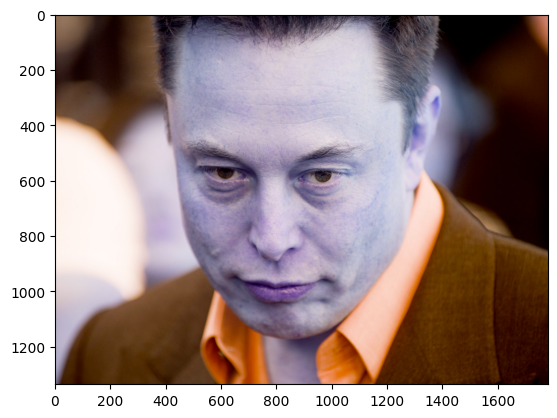

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1336, 1781)

In [5]:
gray

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [132, 128, 124, ...,   5,   4,   3],
       [129, 126, 122, ...,   4,   4,   3],
       [125, 123, 120, ...,   4,   3,   3]], dtype=uint8)

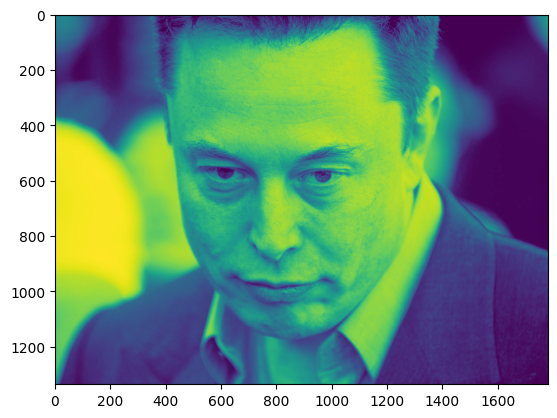

In [6]:
plt.imshow(gray)

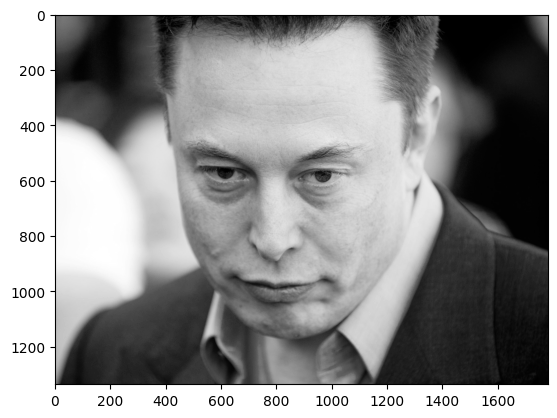

In [7]:
plt.imshow(gray,cmap="gray")

In [8]:
face_cascade=cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray, 1.3, 5)

In [9]:
# For Python flask server, -> Util.py
# face_cascade=cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
# eye_cascade=cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")

# gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# faces=face_cascade.detectMultiScale(gray, 1.3, 5)

# cropped_faces=[]
# for (x,y,w,h) in faces:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = img[y:y+h, x:x+w]

#         eyes=eye_cascade.detectMultiScale(roi_gray)
#         if len(eyes)>=2:
#             return roi_color

In [10]:
faces

array([[ 267,  155, 1097, 1097]])

In [11]:
(x,y,w,h)=faces[0]
x,y,w,h

(267, 155, 1097, 1097)

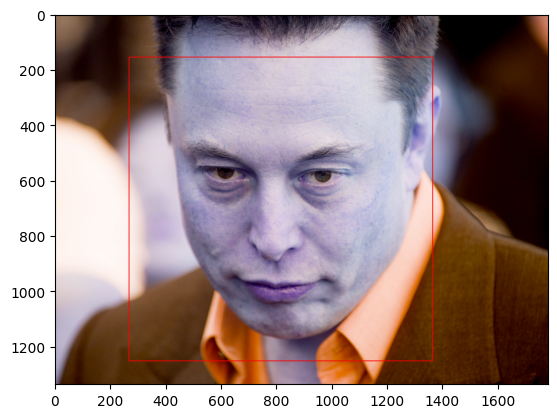

In [12]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [13]:
gray.shape

(1336, 1781)

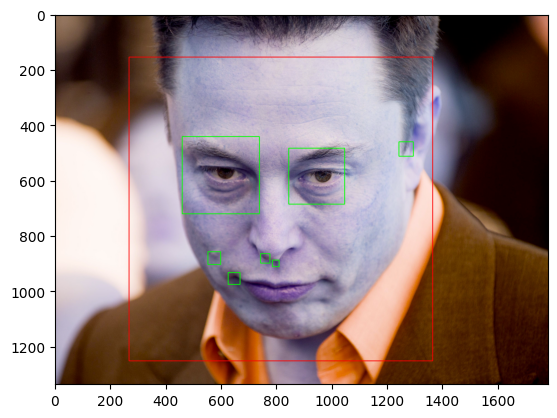

In [14]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
        
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap="gray")
plt.show()

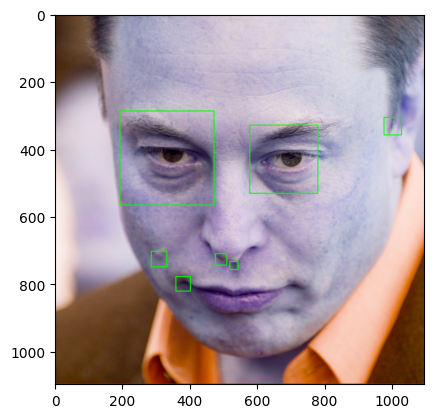

In [15]:
%matplotlib inline
plt.imshow(roi_color,cmap="gray")

#### Data Cleaning

In [16]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    if img is not None:   
        gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray,1.3,5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]

            eyes=eye_cascade.detectMultiScale(roi_gray)
            if len(eyes)>=2:
                return roi_color

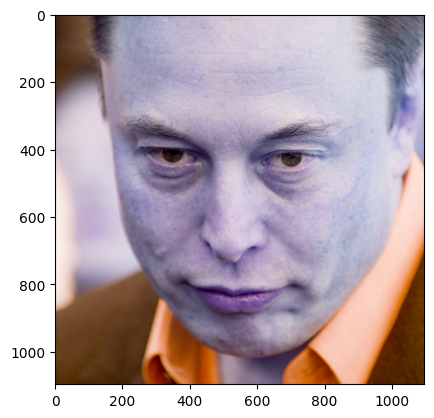

In [17]:
plt.imshow(get_cropped_image_if_2_eyes("./test_image/Image_2.jpg"))

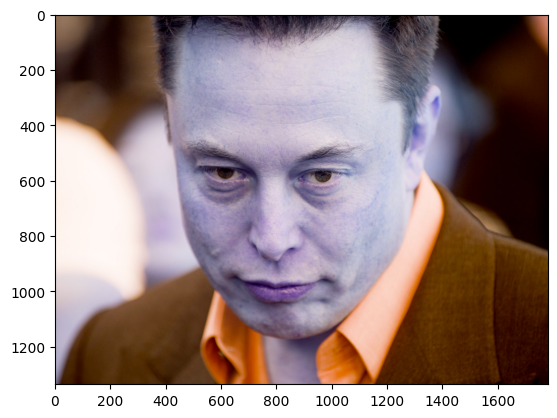

In [18]:
original_image=cv2.imread("./test_image/Image_2.jpg")
plt.imshow(original_image)

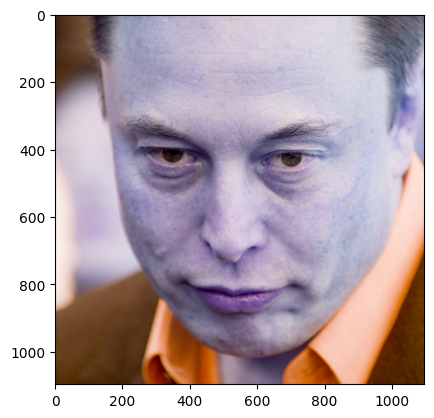

In [19]:
cropped_image=get_cropped_image_if_2_eyes("./test_image/Image_2.jpg")
plt.imshow(cropped_image)
                

In [20]:
path_to_data="./images/"
path_to_cropped_data="./images_cropped/"

In [21]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['./imagesss/Amancio Ortega',
 './imagesss/Bernard Arnault',
 './imagesss/Bill Gates',
 './imagesss/Carlos Slim Helu',
 './imagesss/Charles Koch',
 './imagesss/Elon Musk',
 './imagesss/Francoise Bettencourt Meyers',
 './imagesss/Jack Ma',
 './imagesss/Jeff Bezos',
 './imagesss/Jim Walton',
 './imagesss/Julia Koch',
 './imagesss/Larry Ellison',
 './imagesss/Larry Page',
 './imagesss/Mark Zuckerberg',
 './imagesss/Michael Bloomberg',
 './imagesss/Mukesh Ambani',
 './imagesss/Sergey Brin',
 './imagesss/Steve Ballmer',
 './imagesss/Warren Buffett',
 './imagesss/Zhong Shanshan']

In [23]:
# import shutil
# if os.path.exists(path_to_cropped_data):
#     shutil.rmtree(path_to_cropped_data)
# os.mkdir(path_to_cropped_data)

In [24]:
# import shutil
if not os.path.exists(path_to_cropped_data):
#     shutil.rmtree(path_to_cropped_data)
    os.mkdir(path_to_cropped_data)

In [25]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split("/")[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cropped_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_image_dirs.append(cropped_folder)
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

Amancio Ortega
Generating cropped images in folder:  ./images_croppedss/Amancio Ortega
Bernard Arnault
Generating cropped images in folder:  ./images_croppedss/Bernard Arnault
Bill Gates
Generating cropped images in folder:  ./images_croppedss/Bill Gates
Carlos Slim Helu
Generating cropped images in folder:  ./images_croppedss/Carlos Slim Helu
Charles Koch
Generating cropped images in folder:  ./images_croppedss/Charles Koch
Elon Musk
Generating cropped images in folder:  ./images_croppedss/Elon Musk
Francoise Bettencourt Meyers
Generating cropped images in folder:  ./images_croppedss/Francoise Bettencourt Meyers
Jack Ma
Generating cropped images in folder:  ./images_croppedss/Jack Ma
Jeff Bezos
Generating cropped images in folder:  ./images_croppedss/Jeff Bezos
Jim Walton
Generating cropped images in folder:  ./images_croppedss/Jim Walton
Julia Koch
Generating cropped images in folder:  ./images_croppedss/Julia Koch
Larry Ellison
Generating cropped images in folder:  ./images_croppeds

#### Feature Engineering - Wavelet Transforms

In [26]:
import numpy as np
import pywt
import cv2

In [27]:
# From Stackoverflow :) thankss

def waveletTrans(img, mode='haar',level=1):
    imArray=img
    
    # Datatype conversions
    # Convert to grayscale
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    
    #convert to float
    imArray=np.float32(imArray)
    imArray /=255
    
    # compute coefficients
    coeff=pywt.wavedec2(imArray, mode, level=level)
    
    # Process Coefficients
    coeff_h=list(coeff)
    coeff_h[0]*=0
    
    #reconstruction
    imArray_h=pywt.waverec2(coeff_h,mode)
    imArray_h*=255
    imArray_h=np.uint8(imArray_h)
    
    return imArray_h

In [28]:
cropped_image_dirs

['./images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_croppedss/Amancio Ortega',
 './images_c

In [29]:
cropped_image_dirs=list(set(cropped_image_dirs))

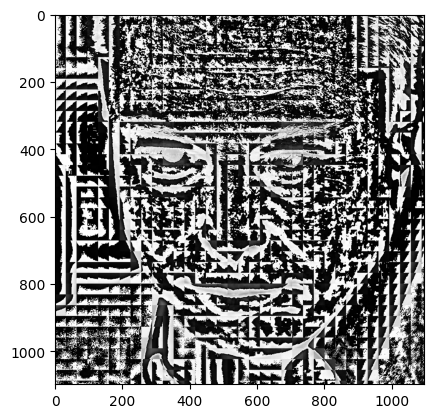

In [30]:
im_har=waveletTrans(cropped_image,"db1",5)
plt.imshow(im_har,cmap="gray")

In [31]:
# listname=[]
# for name in cropped_image_dirs:
#     listname.append(name.split("/")[-1])

In [32]:
# listname=list(set(listname))
# listname

In [33]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Larry Ellison': ['./images_croppedss/Larry Ellison\\Larry Ellison1.png',
  './images_croppedss/Larry Ellison\\Larry Ellison10.png',
  './images_croppedss/Larry Ellison\\Larry Ellison11.png',
  './images_croppedss/Larry Ellison\\Larry Ellison12.png',
  './images_croppedss/Larry Ellison\\Larry Ellison13.png',
  './images_croppedss/Larry Ellison\\Larry Ellison14.png',
  './images_croppedss/Larry Ellison\\Larry Ellison15.png',
  './images_croppedss/Larry Ellison\\Larry Ellison16.png',
  './images_croppedss/Larry Ellison\\Larry Ellison17.png',
  './images_croppedss/Larry Ellison\\Larry Ellison18.png',
  './images_croppedss/Larry Ellison\\Larry Ellison19.png',
  './images_croppedss/Larry Ellison\\Larry Ellison2.png',
  './images_croppedss/Larry Ellison\\Larry Ellison20.png',
  './images_croppedss/Larry Ellison\\Larry Ellison21.png',
  './images_croppedss/Larry Ellison\\Larry Ellison22.png',
  './images_croppedss/Larry Ellison\\Larry Ellison23.png',
  './images_croppedss/Larry Ellison\\Larr

In [34]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count+=1
class_dict

{'Larry Ellison': 0,
 'Michael Bloomberg': 1,
 'Jack Ma': 2,
 'Larry Page': 3,
 'Carlos Slim Helu': 4,
 'Jeff Bezos': 5,
 'Warren Buffett': 6,
 'Mark Zuckerberg': 7,
 'Bernard Arnault': 8,
 'Zhong Shanshan': 9,
 'Amancio Ortega': 10,
 'Elon Musk': 11,
 'Sergey Brin': 12,
 'Julia Koch': 13,
 'Charles Koch': 14,
 'Steve Ballmer': 15,
 'Jim Walton': 16,
 'Bill Gates': 17,
 'Francoise Bettencourt Meyers': 18,
 'Mukesh Ambani': 19}

In [35]:
x=[]
y=[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(48,48))
        img_har=waveletTrans(scalled_raw_img,"db1",5)
#         scalled_img_har=cv2.resize(img_har,(48,48))
        combined_image=np.vstack((scalled_raw_img.reshape(48*48*3,1),img_har.reshape(48*48,1)))
        x.append(combined_image)
        y.append(class_dict[celebrity_name])

In [36]:
48*48*3 + 48*48

9216

In [37]:
len(x)

1166

In [38]:
x


[array([[  1],
        [  1],
        [  1],
        ...,
        [251],
        [  4],
        [  0]], dtype=uint8),
 array([[119],
        [106],
        [ 98],
        ...,
        [178],
        [196],
        [ 18]], dtype=uint8),
 array([[239],
        [203],
        [187],
        ...,
        [232],
        [230],
        [236]], dtype=uint8),
 array([[237],
        [235],
        [225],
        ...,
        [ 11],
        [254],
        [253]], dtype=uint8),
 array([[ 4],
        [34],
        [51],
        ...,
        [30],
        [25],
        [11]], dtype=uint8),
 array([[ 53],
        [ 10],
        [ 28],
        ...,
        [216],
        [216],
        [220]], dtype=uint8),
 array([[237],
        [211],
        [216],
        ...,
        [234],
        [239],
        [ 10]], dtype=uint8),
 array([[115],
        [119],
        [138],
        ...,
        [ 32],
        [ 33],
        [ 33]], dtype=uint8),
 array([[242],
        [235],
        [232],
        ...,
    

In [39]:
x[0],x[1]

(array([[  1],
        [  1],
        [  1],
        ...,
        [251],
        [  4],
        [  0]], dtype=uint8),
 array([[119],
        [106],
        [ 98],
        ...,
        [178],
        [196],
        [ 18]], dtype=uint8))

In [40]:
x[0]

array([[  1],
       [  1],
       [  1],
       ...,
       [251],
       [  4],
       [  0]], dtype=uint8)

In [41]:
x[0][1]

array([1], dtype=uint8)

In [42]:
# cv2.imshow("Image",x[0])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [43]:
x=np.array(x).reshape(len(x),9216).astype(float)
x.shape

(1166, 9216)

In [44]:
x[0]

array([  1.,   1.,   1., ..., 251.,   4.,   0.])

In [45]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


#### Train Model

In [46]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [47]:
dict_max_score = {}

for i in range(51):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i, stratify=y)
    pipe = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="linear", C=1))])
    pipe.fit(x_train, y_train)
    score = pipe.score(x_test, y_test)
    
    if not dict_max_score or score > max(dict_max_score.values()):
        dict_max_score = {i: score}
    
    print(str(i) + ". " + str(score))

dict_max_score

0. 0.8974358974358975
1. 0.8504273504273504
2. 0.9572649572649573
3. 0.8717948717948718
4. 0.9444444444444444
5. 0.9358974358974359
6. 0.9017094017094017
7. 0.9017094017094017
8. 0.8675213675213675
9. 0.9273504273504274
10. 0.8888888888888888
11. 0.9230769230769231
12. 0.8974358974358975
13. 0.8717948717948718
14. 0.8846153846153846
15. 0.9316239316239316
16. 0.9316239316239316
17. 0.8290598290598291
18. 0.8675213675213675
19. 0.9102564102564102
20. 0.905982905982906
21. 0.9145299145299145
22. 0.9102564102564102
23. 0.8931623931623932
24. 0.9316239316239316
25. 0.8803418803418803
26. 0.9230769230769231
27. 0.8760683760683761
28. 0.9102564102564102
29. 0.9102564102564102
30. 0.9230769230769231
31. 0.8888888888888888
32. 0.8888888888888888
33. 0.8888888888888888
34. 0.905982905982906
35. 0.9230769230769231
36. 0.9230769230769231
37. 0.9188034188034188
38. 0.9102564102564102
39. 0.905982905982906
40. 0.8974358974358975
41. 0.8931623931623932
42. 0.9102564102564102
43. 0.9017094017094017
4

{2: 0.9572649572649573}

In [48]:
# random_state=2

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [50]:
# from sklearn.model_selection import cross_val_score

In [51]:
# kernels=["poly","linear","sigmoid","rbf"]
# max_avg={}
# print("Rata-rata Akurasi Cross-Validation:")
# for kernel in kernels:
#     max_avg[kernel]=[]
#     for i in range(1,11):
        
#         pipe=Pipeline([("scaler", StandardScaler()),("svc",SVC(kernel=kernel,C=i))])

#         # cross-validation with 5-fold x_train and y_train
#         scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring='accuracy')
        
#         # Calculate average accuracy from cross-validation
#         average_accuracy = scores.mean()
#         max_avg[kernel].append(average_accuracy)
#         print(f"Kernel: {kernel} c: {i}: ", average_accuracy)

In [52]:
# max_=max(max_avg.values())
# max_

In [53]:
# for kernel,value in max_avg.items():
#     if max_==value:
#         print(kernel,value)

In [54]:
pipe=Pipeline([("scaler", StandardScaler()),("svc",SVC(kernel="linear",C=1))])

In [55]:
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.9572649572649573

In [56]:
len(x_test),len(y_test)

(234, 234)

In [57]:
len(x_train),len(y_train)

(932, 932)

In [58]:
import pandas as pd
pd.Series(y_train).value_counts(normalize=True)

2     0.099785
19    0.091202
18    0.077253
11    0.071888
12    0.071888
15    0.065451
1     0.063305
5     0.054721
8     0.040773
7     0.040773
4     0.039700
6     0.039700
0     0.036481
10    0.036481
17    0.034335
3     0.031116
9     0.028970
13    0.027897
16    0.027897
14    0.020386
Name: proportion, dtype: float64

In [59]:
pd.Series(y_test).value_counts(normalize=True)

2     0.098291
19    0.089744
18    0.076923
11    0.072650
12    0.072650
15    0.064103
1     0.064103
5     0.055556
4     0.038462
0     0.038462
7     0.038462
10    0.038462
8     0.038462
6     0.038462
17    0.034188
16    0.029915
3     0.029915
13    0.029915
9     0.029915
14    0.021368
Name: proportion, dtype: float64

In [60]:
y_pred=pipe.predict(x_test)

In [61]:
y_pred

array([11, 18, 15,  0, 13, 18,  7, 14, 18,  5,  5, 19,  2, 17,  8,  6,  1,
       18, 16,  2, 16,  8,  5,  4, 10,  1,  5,  0,  1, 19,  8,  7,  3,  3,
       15, 10,  2, 12, 15, 11,  8,  1,  1, 18, 12, 11,  7, 11,  9,  1,  2,
       11,  2,  2, 19, 12,  2, 16, 17,  5, 18,  2,  1,  6,  1, 12,  5,  7,
       15, 19, 11,  1,  2, 19, 19, 12,  0, 12,  9,  6, 16,  4, 19,  1, 19,
       18, 12, 10, 17,  3, 12, 15,  5,  3,  6,  6, 18, 19, 17,  8, 13,  9,
        2, 15,  2, 19,  4, 12, 13, 11, 19, 10,  5,  9, 19,  7, 19,  2,  8,
        2,  0, 19, 11, 13,  9, 11, 16,  4,  8, 12,  2, 15, 16, 14, 13,  7,
        8,  5,  4, 18, 15,  6,  5,  1,  4, 11, 11, 15, 15, 17, 18, 18,  0,
       12,  0, 14, 14,  1,  6, 11,  2, 18, 12, 11, 12,  9, 17,  7,  1,  2,
       18,  5,  2, 10, 19,  1,  5, 16, 18,  6, 10, 10, 13,  4, 15, 19, 10,
       18, 12,  2,  2, 18,  5, 12, 16, 12,  3,  0, 10, 19,  3, 10, 19, 15,
       18,  1,  1,  2, 11, 12,  8, 11, 19,  5, 19, 15, 10, 11, 19,  4, 18,
       10,  1, 14,  9,  4

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.88      1.00      0.94        15
           2       1.00      1.00      1.00        23
           3       1.00      0.86      0.92         7
           4       1.00      1.00      1.00         9
           5       0.93      1.00      0.96        13
           6       1.00      1.00      1.00         9
           7       1.00      0.78      0.88         9
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         7
          10       0.75      1.00      0.86         9
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         5
          15       0.86      0.80      0.83        15
          16       0.75      0.86      0.80         7
          17       1.00    

#### Use GridSearch to try out different models with different parameters.
#### Goal is to come up with best model with best fine tuned parameters.

In [63]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [64]:
model_params = {
    'SVM': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,5,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'LogisticRegression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [65]:
scores=[]
best_estimators={}
import pandas as pd
for algo, mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp["model"])
    clf=GridSearchCV(pipe,mp["params"],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        "model": algo,
        "best_score":clf.best_score_,
        "best_params":clf.best_params_
    })
    print(algo)
    best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=["model","best_score","best_params"])
df

SVM
RandomForest
LogisticRegression


,model,best_score,best_params
0,SVM,0.825111,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,RandomForest,0.664177,{'randomforestclassifier__n_estimators': 10}
2,LogisticRegression,0.859468,{'logisticregression__C': 1}


In [71]:
best_estimators

{'SVM': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'LogisticRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

So i'll use SVM model for this case

In [72]:
best_estimators["SVM"].score(x_test,y_test)

0.9572649572649573

In [73]:
best_estimators["RandomForest"].score(x_test,y_test)

0.8205128205128205

In [74]:
best_estimators["LogisticRegression"].score(x_test,y_test)

0.9358974358974359

In [75]:
best_clf=best_estimators["SVM"]

In [76]:
y_pred=best_clf.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 8,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

In [78]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'y_test')

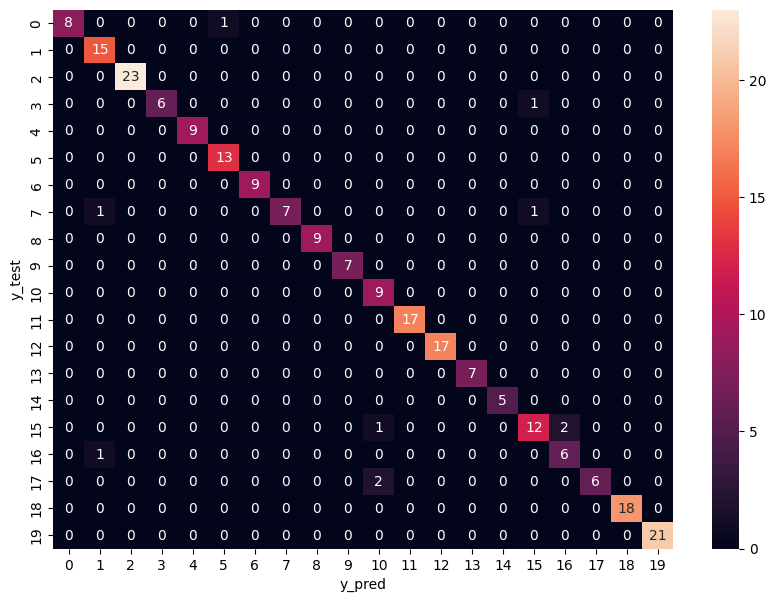

In [79]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_test")

In [80]:
class_dict

{'Larry Ellison': 0,
 'Michael Bloomberg': 1,
 'Jack Ma': 2,
 'Larry Page': 3,
 'Carlos Slim Helu': 4,
 'Jeff Bezos': 5,
 'Warren Buffett': 6,
 'Mark Zuckerberg': 7,
 'Bernard Arnault': 8,
 'Zhong Shanshan': 9,
 'Amancio Ortega': 10,
 'Elon Musk': 11,
 'Sergey Brin': 12,
 'Julia Koch': 13,
 'Charles Koch': 14,
 'Steve Ballmer': 15,
 'Jim Walton': 16,
 'Bill Gates': 17,
 'Francoise Bettencourt Meyers': 18,
 'Mukesh Ambani': 19}

In [81]:
import joblib

In [82]:
# Save the model as a pickle in a file
joblib.dump(best_clf,"Saved_Model.pkl")

['Saved_Model.pkl']

In [83]:
import json
with open("Class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))